# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pip install nbconvert[webpdf]


zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.


In [3]:
### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
there are 1898 rows and 9 columns in df dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data contained in:order_id,customer_id,food_preparation_time and delivery_time columns have integer datatype
 
 Data contained in :restaurant_name, cuisine_type,day_of_the_week and rating columns have object datatype
 
 Data contained in cost_of_the_order have float datatype

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [7]:

df['restaurant_name']=df.restaurant_name.astype('category')
df['cuisine_type']=df.cuisine_type.astype('category')
df['day_of_the_week']=df.day_of_the_week.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
changing restaurant_name, cuisine_type and day_of_the_week columns from object to category data type reduced memory usage from 133.6+ KB to 102.7+ KB

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum time it takes to prepare the food once an order is placed is 20 minutes.

The average time it takes to prepare food once an order is placed is 27.37  minutes.

The maximum time it takes to prepare food once an order place is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
The number of orders that were not rated is 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<AxesSubplot:xlabel='cost_of_the_order', ylabel='count'>

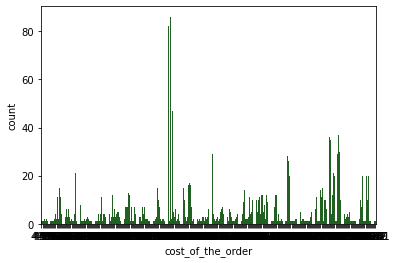

In [10]:
sns.countplot(data=df, x='cost_of_the_order', color='GREEN', saturation=0.5 )

OBSERVATION:
The most frequent cost of order is observed approximately 90 times.
Majority of the costs of order appeared less than 20 times.

In [11]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  sharex=True,  gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize, ) 
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet" )  
    
    sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter" ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)  
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--" )  
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  

OBSERVATIONS ON COST OF THE ORDER

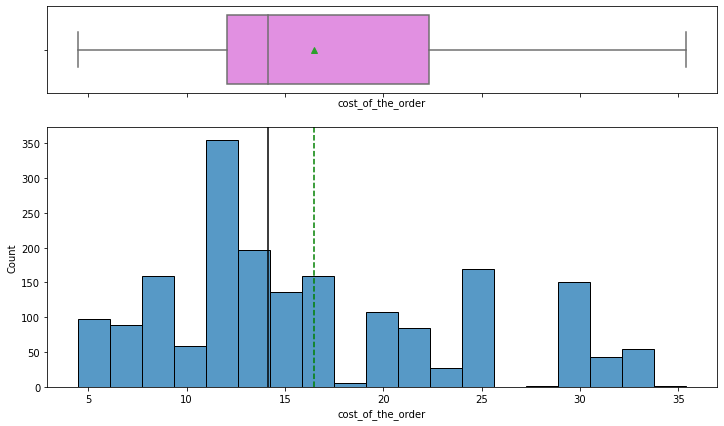

In [12]:
histogram_boxplot(df, 'cost_of_the_order')

OBSERVATIONS:
    cost of the order data does not have any outlier values.
    
    The distribution of cost data has one peak at approximately 12
    
    Median cost of the order is approximately equal to 14.
    
    The average cost 0f the order is approximately equal to 16.5
    
    
 

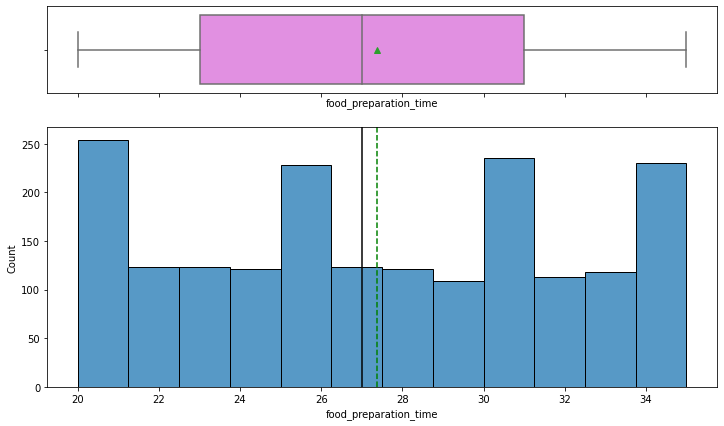

In [13]:
histogram_boxplot(df,'food_preparation_time')

OBSERVATIONS:

Graphs displayed above show that food preparation data does not have any outlier values.

Mean and median values of food preparation time data are relatively close.

Mean value is equal to 27.3 and  median value is approximately 27.
This suggests that that food preparation time data have a symmetrical distribution.

Food preparation time data has 4 peaks.The rest of the values are fairly close in count.

OBSERVATIONS ON DELIVERY TIME

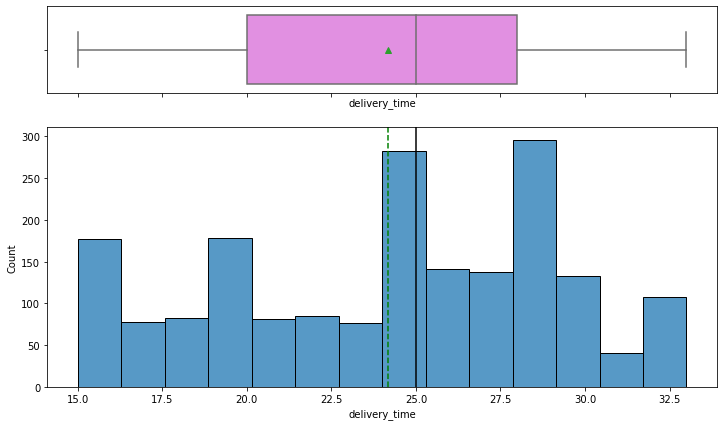

In [14]:
histogram_boxplot(df,'delivery_time')

OBSERVATIONS:

Graphs displayed above suggests that delivery time data do not have any outlier values.

Mean value for delivery time data is approximately 24 minutes.

Median delivery time 
value is approximately 25 minutes.



OBSERVATIONS ON CATEGORICAL DATA



In [15]:

def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total ) 
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  

    plt.show()  



OBSERVATIONS ON CUISINE TYPES

<Figure size 720x504 with 0 Axes>

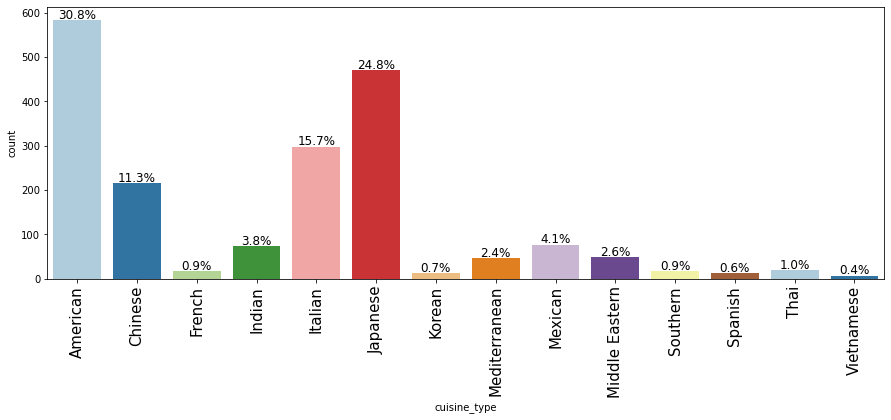

In [16]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'cuisine_type', perc=True)

OBSERVATIONS:

American cuisine is the most frequently ordered cuisine type.

Japanese cuisine is the second most ordered cuisine.

Viatnemese cuisine is the least ordered among all cuisine types.

French, Korean,southern and Viatnamese cuisineses are ordered less than 1% of the time.

OBSERVATIONS ON DAYS OF THE WEEK

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

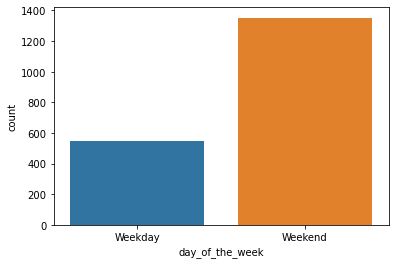

In [17]:
sns.countplot(data=df,x='day_of_the_week')

<Figure size 720x504 with 0 Axes>

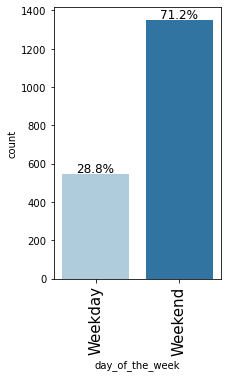

In [18]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'day_of_the_week', perc=True)

OBSERVATIONS: According to both countplot and barplot shown above,restaurants receive significantly more orders on weekend days compared to weekdays

OBSERVATIONS ON RATINGS

<AxesSubplot:xlabel='rating', ylabel='count'>

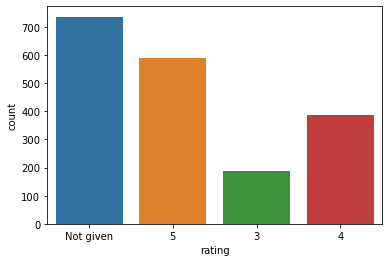

In [19]:
sns.countplot(data=df,x='rating')

<Figure size 720x504 with 0 Axes>

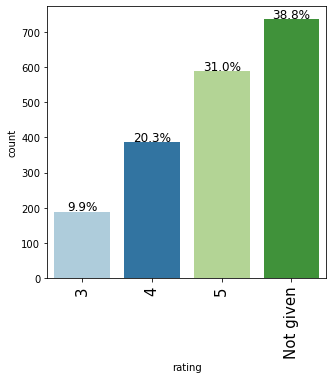

In [20]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'rating', perc=True)

OBSERVATIONS: 
As shown on both the barplot and the countplot, the majority of orders, which is about 38.8%, were not rated.

About 31.% of the orders were rated 5.

About 9.9% of the orders were rated 3.

About 20.3% of the orders were rated 4.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
#LOOKING FOR THE NUMBER OF TIMES THE RESTAURANT APPEAR
n=5
df['restaurant_name'].value_counts()[:n]


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake shack received the most orders which is 219. 

The meatball shop had 132 orders,which makes it the second highest.

Blue Ribbon Sushi received the third highest number of orders, which is 119.

Blue Ribbon Fried Chicken received the fourth highest number of orders, which is 96. 

Parm received 68 orders, which is the fifth highest number of orders any restaurant has received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
weekend_data = df[df['day_of_the_week'] == 'Weekend']
weekend_data['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

OBSERVATIONS :
American cuisine is the most popular on weekends and it is ordered 415 times.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
new_df=df[df['cost_of_the_order']>20]
#new_df represent orders that cost above 20 dollars
print(new_df.shape[0]) #This returns a count of all orders that cost above 20 dollars
print(df.shape[0]) #This returns a count of all orders
percentage = (new_df.shape[0] / df.shape[0]) * 100
print("the percentage is:", round(percentage,0 ), '%')

555
1898
the percentage is: 29.0 %


OBSERVATIONS:
    29 percent of the orders cost more than 20 dollars 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here
mean=df['delivery_time'].mean()
print('the mean value of order delivery time data is equal to:', round(mean,2))

the mean value of order delivery time data is equal to: 24.16


#### Observations:
The average time it takes to deliver an order is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
n=5
df['customer_id'].value_counts()[:n]

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

In [26]:
df['customer_id'].value_counts().head(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64



#### Observations:
Top 5 most frequent customers who qualify for a 20% discount are: 
A customer with Id number 52832 who placed 13 orders, a customer with Id number 47440 who placed 10 orders, a customer with Id number 83287 who placed 9 orders, a customer with Id number 250494 who placed 8 orders and a customer with Id number 259341 who placed 7 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Relationships between numerical variables

Relationship between cost of order and food preparation time


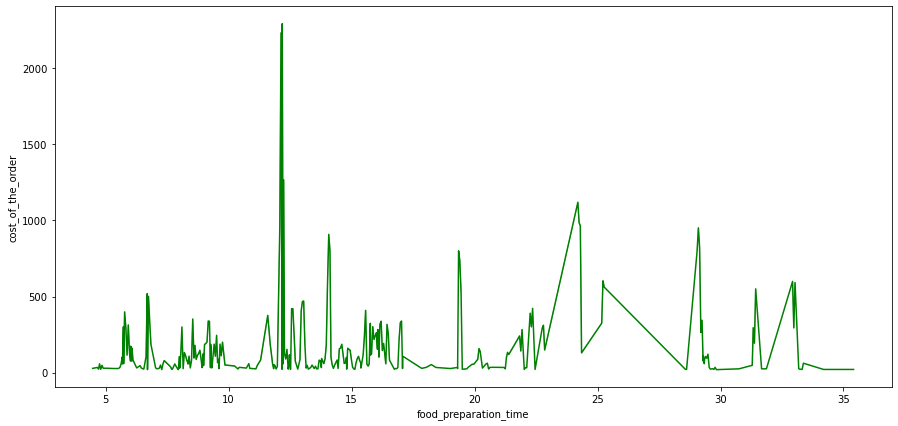

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(x='cost_of_the_order', y='food_preparation_time',estimator='sum',ci=0,data=df,color="GREEN")
plt.ylabel('cost_of_the_order')
plt.xlabel('food_preparation_time')
plt.show()

<AxesSubplot:xlabel='cost_of_the_order', ylabel='food_preparation_time'>

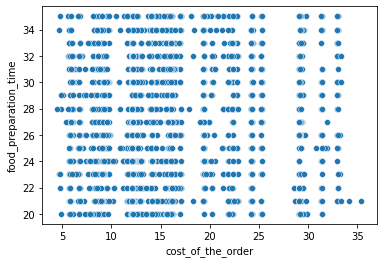

In [28]:
sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time')

Relationship between cost of order and delivery time

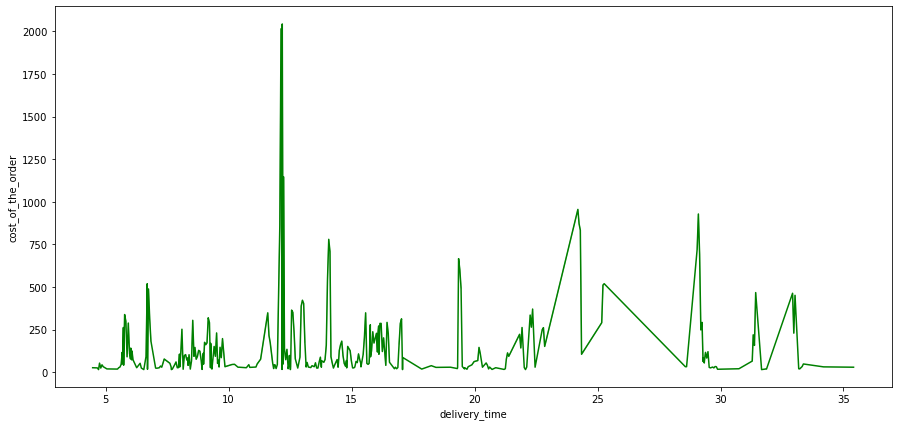

In [29]:
plt.figure(figsize=(15,7))
sns.lineplot(x='cost_of_the_order', y='delivery_time',estimator='sum',ci=0,data=df,color="GREEN")
plt.ylabel('cost_of_the_order')
plt.xlabel('delivery_time')
plt.show()

<AxesSubplot:xlabel='cost_of_the_order', ylabel='delivery_time'>

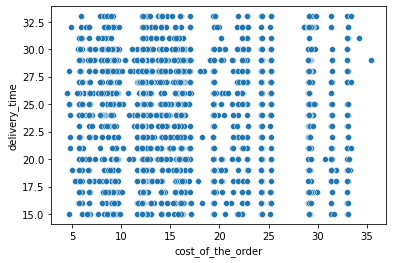

In [30]:
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time')

Relationship between food preparation time and delivery time


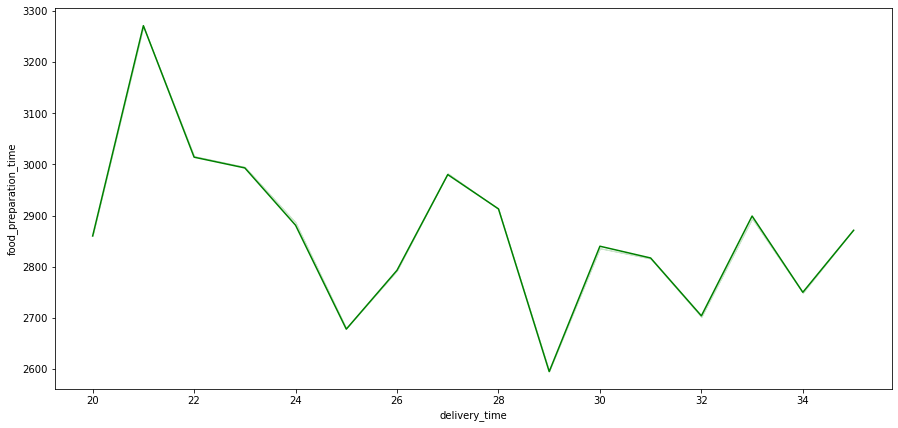

In [33]:
plt.figure(figsize=(15,7))
sns.lineplot(x='food_preparation_time', y='delivery_time',estimator='sum',ci=0,data=df,color="GREEN")
plt.ylabel('food_preparation_time')
plt.xlabel('delivery_time')
plt.show()

<AxesSubplot:xlabel='food_preparation_time', ylabel='delivery_time'>

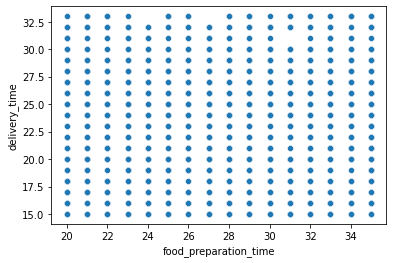

In [34]:
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time')

CORRELATION

BIVARIATE HEATMAP

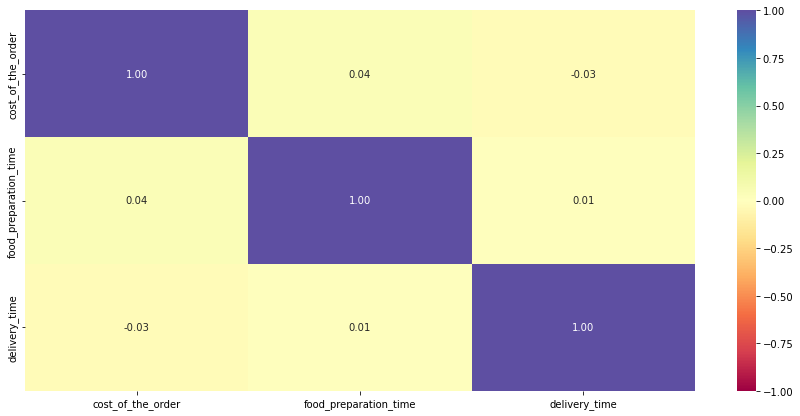

In [35]:
numerical_variables = ['cost_of_the_order','food_preparation_time','delivery_time']
corr = df[numerical_variables].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show() 


OBSERVATIONS:
The heatmap above does not indicate any correlation between numerical data values.

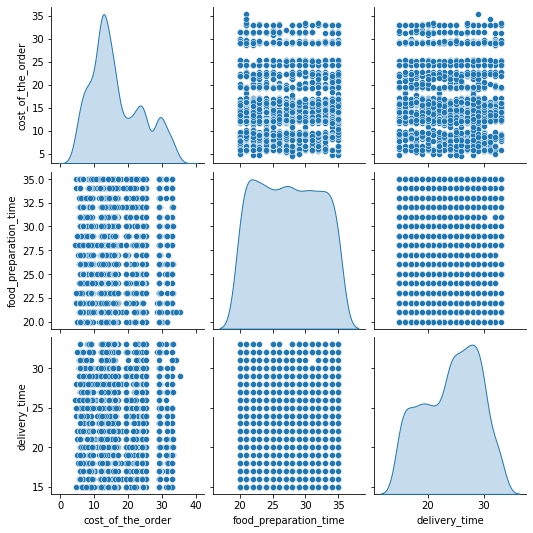

In [36]:
sns.pairplot(data=df[numerical_variables], diag_kind="kde")
plt.show()

OBSERVATIONS:

pairplot diaplayed above, like heatmap, indicates that there is no significant correlation between numerical values.

CATEGORICAL VS NUMERICAL VALUES

Relationship between delivery time and rating

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


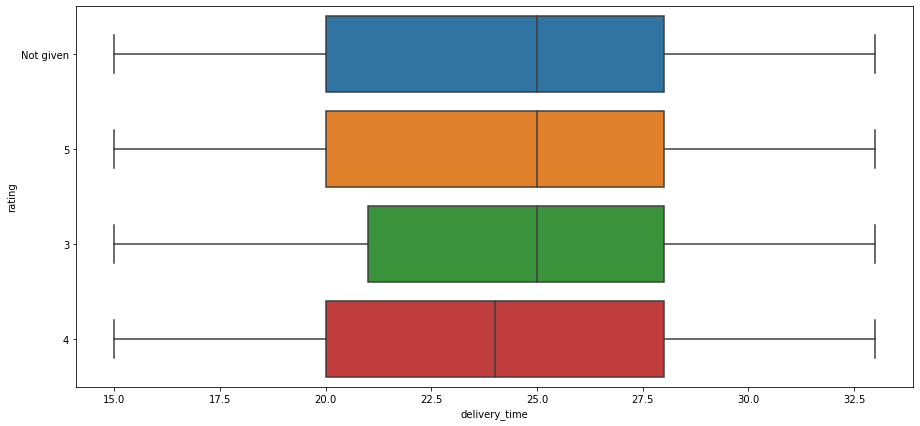

In [37]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['delivery_time'],df['rating'])
plt.ylabel('rating')
plt.xlabel('delivery_time')
plt.show()

Relationship between food preparation time and rating 

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


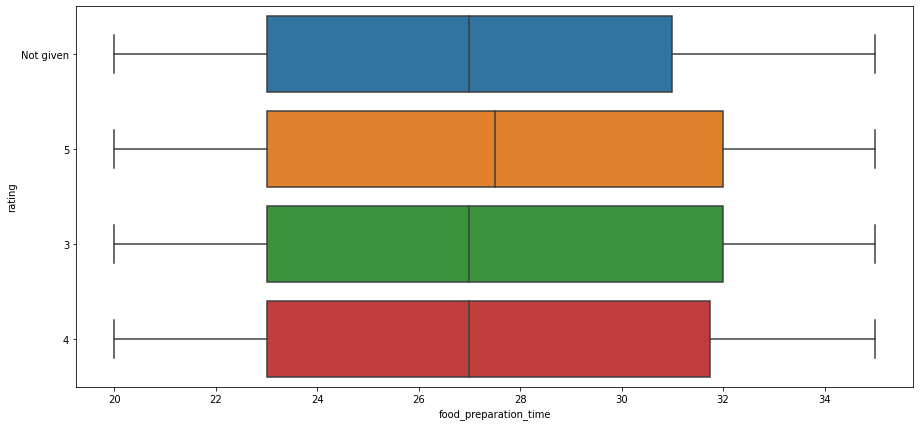

In [38]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['food_preparation_time'],df['rating'])
plt.ylabel('rating')
plt.xlabel('food_preparation_time')
plt.show()

Relationship between cost of order and rating

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


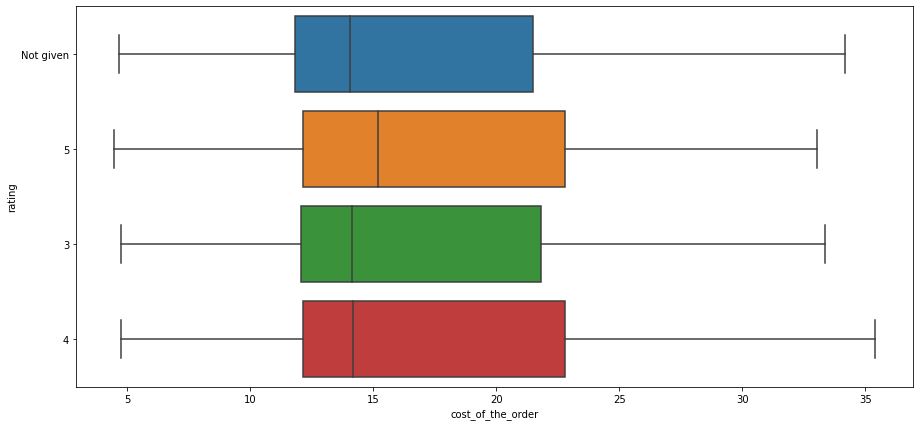

In [39]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['cost_of_the_order'],df['rating'])
plt.ylabel('rating')
plt.xlabel('cost_of_the_order')
plt.show()

Relationship between day of the week and delivery time 

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


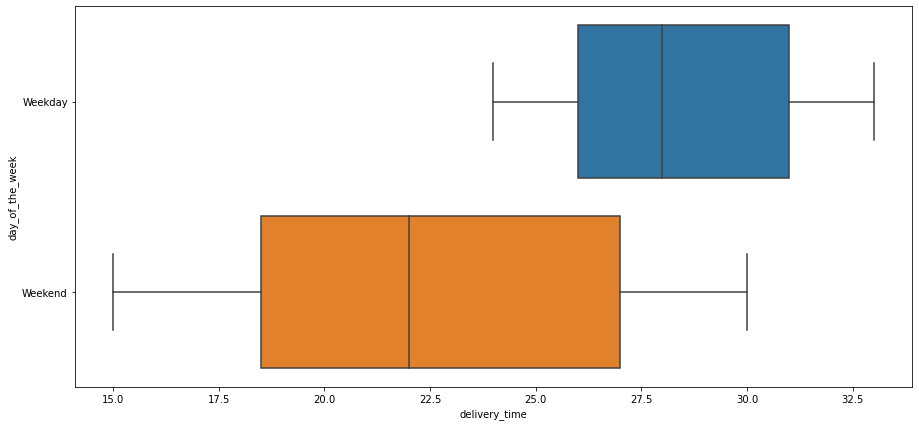

In [40]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['delivery_time'],df['day_of_the_week'])
plt.ylabel('day_of_the_week')
plt.xlabel('delivery_time')
plt.show()

OBSERVATIONS:
it takes significantly more time to deliver an order on weekdays than weekend days.

Relationship between day of the week and food_preparation_time

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


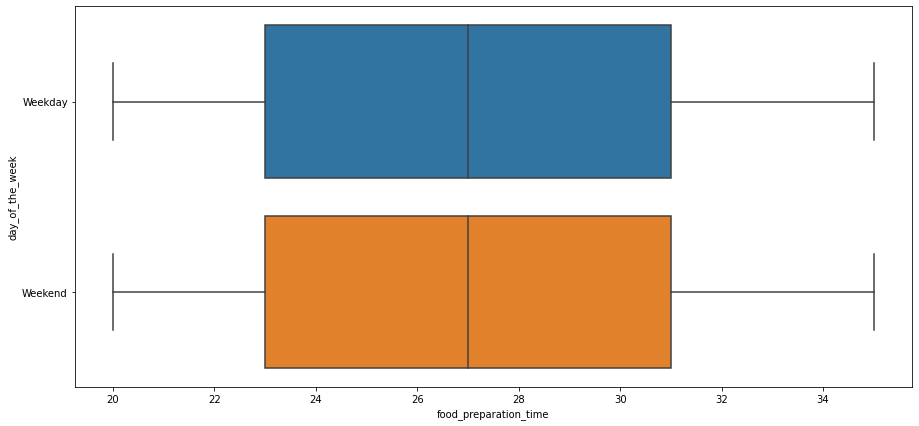

In [41]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['food_preparation_time'],df['day_of_the_week'])
plt.ylabel('day_of_the_week')
plt.xlabel('food_preparation_time')
plt.show()

Relationship between day of the week and cost of the order

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


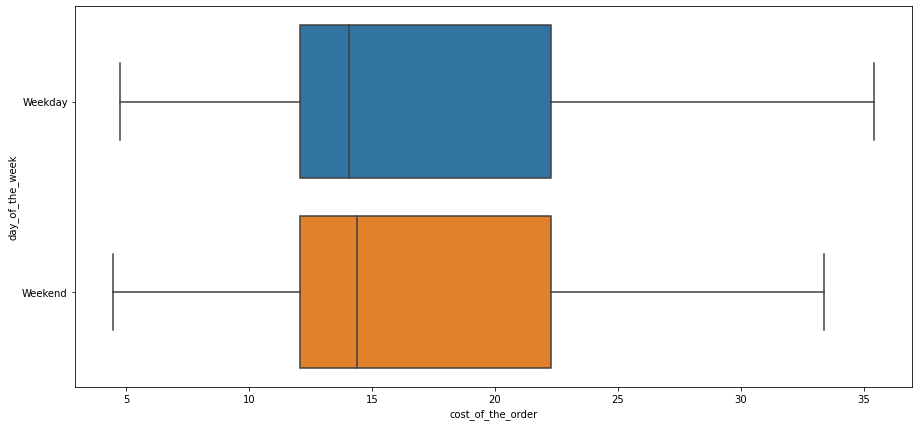

In [42]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['cost_of_the_order'],df['day_of_the_week'])
plt.ylabel('day_of_the_week')
plt.xlabel('cost_of_the_order')
plt.show()

Relationship between cuisine type and food delivery time

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


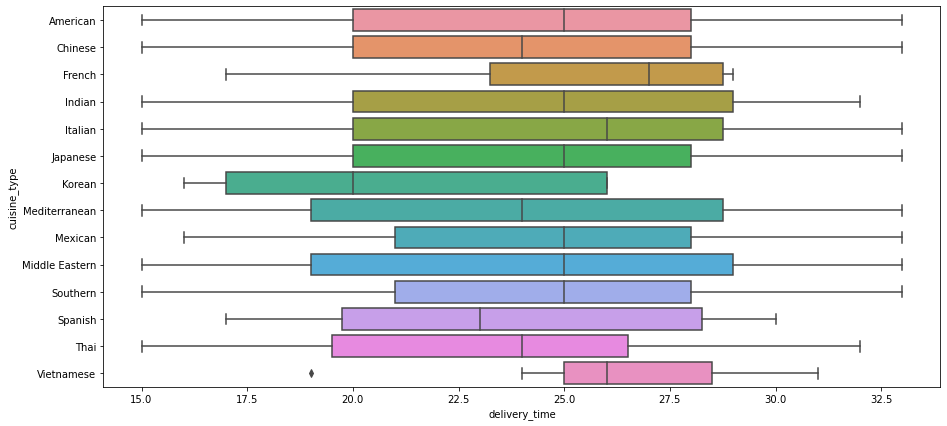

In [43]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['delivery_time'],df['cuisine_type'])
plt.ylabel('cuisine_type')
plt.xlabel('delivery_time')
plt.show()

OBSERVATIONS:


Relationship between cuisine type and food preparation time

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


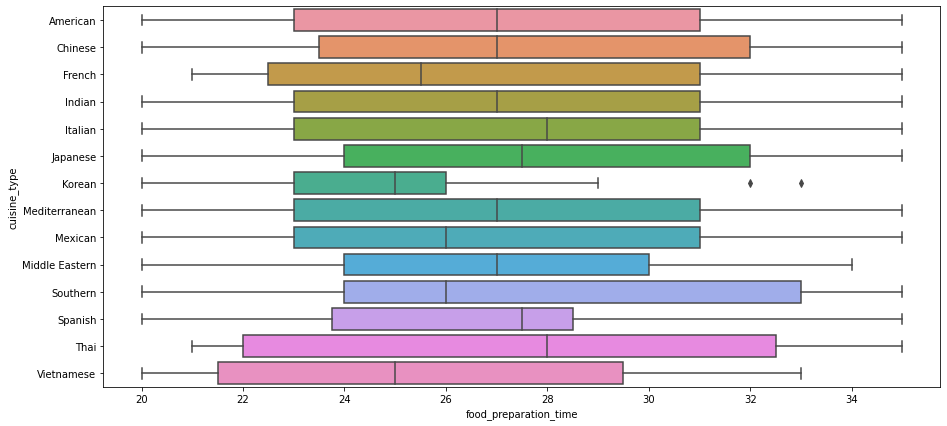

In [44]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['food_preparation_time'],df['cuisine_type'])
plt.ylabel('cuisine_type')
plt.xlabel('food_preparation_time')
plt.show()

Relationship between cuisine type and cost of order

/Users/sandrinebakuramutsa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


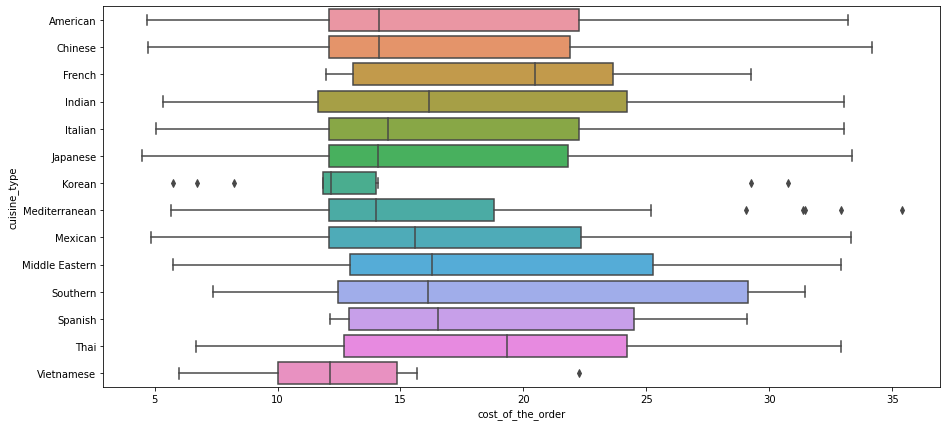

In [45]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['cost_of_the_order'],df['cuisine_type'])
plt.ylabel('cuisine_type')
plt.xlabel('cost_of_the_order')
plt.show()

OBSERVATIONS:
cost of the order data for mediterranean cuisine, vietnamese cuisine and korean cuisine have outliers.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
rated_orders = df[df['rating'] != 'Not given'].copy()
rated_orders['rating'] = rated_orders['rating'].astype('int') 
rated_orders = rated_orders.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rated_orders.head() 

#This is represents restaurants and the total count of their ratings.

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [47]:
#what are the restaurants with more than 50 ratings?
restaurants=rated_orders[rated_orders['rating']>50]['restaurant_name']
print(restaurants)


0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: category
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr', 'da Umberto', 'ilili Restaurant', 'indikitch']


In [48]:
restaurants = rated_orders[rated_orders['restaurant_name'].isin(restaurants)].copy()




In [49]:
restaurants.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,Shake Shack,133.0
1,The Meatball Shop,84.0
2,Blue Ribbon Sushi,73.0
3,Blue Ribbon Fried Chicken,64.0


OBSERVATIONS:
    

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
 def compute_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()


NameError: name 'compute_rev' is not defined

In [ ]:
total_revenue = df['Revenue'].sum()
print(total_revenue)

#### Observations:
The net revenue generated by the company is 6166.0 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
#total time needed to prepare and deliver a food order
df['total_time_taken'] = df['food_preparation_time'] + df['delivery_time']
new_dataset=df[df['total_time_taken']>60]


In [ ]:
new_dataset=df[df['total_time_taken']>60]
print('new_dataset')
print(new_dataset.shape[0])
print(df.shape[0])
percentage = (new_dataset.shape[0] / df.total_time_taken.shape[0]) * 100
print("the percentage is:", round(percentage,0 ),'%')

  OBSERVATIONS:
The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 11 percent.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Relationship between mean delivery time and day of the week

In [ ]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['delivery_time'],df['day_of_the_week'])
plt.ylabel('day_of_the_week')
plt.xlabel('delivery_time')
plt.show()

#### Observations:

Mean delivery time on weekends is significantly shorter than mean delivery time on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Conclusions:

1)American cuisine is the most frequently ordered cuisine type.

Japanese cuisine is the second most ordered cuisine.

Viatnemese cuisine is the least ordered among all cuisine types.

2)71.2 percent of orders are placed on weekend days

3)38.8 percent of orders are not rated

4)It takes significantly more time to deliver an order on weekdays than weekend days.

5)Cost of the order, delivery time and food preparation time do not have any significant effect on the rating clients provide for their orders.

RECOMMENDATIONS:

1) There is high demand on weekend days. The company should ensure there are anough resources to satisfy this high demand on weekend days.

2)American cuisine is the most frequently ordered cuisine. The company should partner with more restaurants that sell American cuisine to optimize revenues

3) The company should conduct deep and broader studies to investigate why it takes significantly more time to deliver an order on weekdays than weekend days

4)The company should also further analyse factors that influence ratings clients provide after receiving their orders, and why they choose not to rate their orders in most cases.




